In [1]:
# Colab cell (code)
!nvidia-smi || echo "No GPU (will run on CPU)"


Thu Dec 11 04:54:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Colab cell (code)
!pip install -q torch torchvision timm scikit-learn pandas pillow matplotlib tqdm gradio


In [ ]:
'''import zipfile
import os

# 1. Pehle hum zip file ko Colab ke andar unzip karenge
# (Make sure aapne zip file upload kar di ho)
zip_path = '/content/fruit_sample_dataset.zip'

if os.path.exists(zip_path):
    print("Zip file mil gayi! Unzipping...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("Unzip complete ho gaya.")
else:
    print("Error: Zip file nahi mili. Please 'fruit_sample_dataset.zip' upload karein.")

# 2. Ab hum DATA_ROOT ka path change karenge jo Colab samajh sake
# Windows wala path hata kar ye naya path use karein:
DATA_ROOT = '/content/fruit_sample_dataset'

print("Naya DATA_ROOT set ho gaya:", DATA_ROOT)

# 3. Ab check karte hain
if os.path.exists(DATA_ROOT):
    print("Success! Folder mil gaya.")
    # Ab aap wo list wala code dobara run kar sakte hain
    for d in sorted(os.listdir(DATA_ROOT)):
        p = os.path.join(DATA_ROOT, d)
        if os.path.isdir(p):
            print(f"Found folder: {d}")
else:
    print("Abhi bhi folder nahi mila. Kya zip file ka naam sahi tha?")'''


Zip file mil gayi! Unzipping...
Unzip complete ho gaya.
Naya DATA_ROOT set ho gaya: /content/fruit_sample_dataset
Success! Folder mil gaya.
Found folder: images


In [7]:
# Colab cell (code) — Upload and Fix Name
import os
from google.colab import files

print("Niche button se 'kaggle.json' select kare:")
uploaded = files.upload()

# Naam theek karne ka magic
for filename in uploaded.keys():
    print(f"File upload hui: {filename}")
    if filename != 'kaggle.json':
        os.rename(filename, 'kaggle.json')
        print(" Naam change karke 'kaggle.json' kar diya gaya.")

# Permission set
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json

# Check
if os.path.exists("/content/kaggle.json"):
    print("\n Sab set hai! Ab aap Dataset Download wala code chala sakti hain.")
else:
    print(" Kuch gadbad hui, file nahi mili.")

Niche button se 'kaggle (1).json' select karein:


Saving kaggle (1).json to kaggle (1).json
File upload hui: kaggle (1).json
✅ Naam change karke 'kaggle.json' kar diya gaya.

🎉 Sab set hai! Ab aap Dataset Download wala code chala sakti hain.


In [9]:
# Colab cell (code) — Download Fresh vs Rotten Dataset
import os

# 1. Kaggle Config set karte hain
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# 2. Key check karte hain
if not os.path.exists("/content/kaggle.json"):
    print(" Error: 'kaggle.json' nahi mili. ?")
else:
    print(" Key mil gayi! Downloading Dataset...")

    # Ye command naya dataset download karega
    !kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

    print("Download complete! Unzipping...")

    # Clean folder mein unzip karte hain
    !unzip -q fruits-fresh-and-rotten-for-classification.zip -d /content/fresh_rotten_dataset

    print(" Dataset ready at: /content/fresh_rotten_dataset")

✅ Key mil gayi! Downloading Dataset...
Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
 99% 3.55G/3.58G [00:56<00:00, 73.4MB/s]
100% 3.58G/3.58G [00:56<00:00, 67.9MB/s]
Download complete! Unzipping...
🎉 Dataset ready at: /content/fresh_rotten_dataset


In [10]:
# Colab cell (code) — Generate Metadata
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Naye dataset ka path set karte hain
base_dir = '/content/fresh_rotten_dataset/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

data = []

# Function jo folder scan karega
def process_folder(folder_path, split_name):
    if not os.path.exists(folder_path):
        print(f" Warning: {folder_path} nahi mila.")
        return

    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)

        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    full_path = os.path.join(class_path, img_name)

                    # Logic: Fresh hai ya Rotten?
                    if 'fresh' in class_name.lower():
                        days = 2.0  # Fresh fruit
                    elif 'rotten' in class_name.lower():
                        days = 10.0 # Rotten fruit
                    else:
                        days = 5.0 # Unknown

                    data.append({
                        'image_path': full_path,
                        'class_label_text': class_name,
                        'days_since_harvest': days,
                        'storage_temp': 24.0,
                        'humidity': 50.0,
                        'split': split_name
                    })

print("Scanning Train folder...")
process_folder(train_dir, 'train')

print("Scanning Test folder...")
process_folder(test_dir, 'val')

# DataFrame banate hain
df = pd.DataFrame(data)
print(f"Total Images: {len(df)}")

if len(df) > 0:
    train_df = df[df['split'] == 'train']
    val_df = df[df['split'] == 'val']

    train_df.to_csv('/content/train_meta.csv', index=False)
    val_df.to_csv('/content/val_meta.csv', index=False)

    print(" New CSVs created: train_meta.csv & val_meta.csv")
else:
    print(" Koi images nahi mili. Path check karein.")

Scanning Train folder...
Scanning Test folder...
Total Images: 13599
✅ New CSVs created: train_meta.csv & val_meta.csv


In [12]:
# show top-level and counts
!ls -la /content/fresh_rotten_dataset
!find /content/fresh_rotten_dataset -maxdepth 2 -type f | sed -n '1,30p'


total 12
drwxr-xr-x 3 root root 4096 Dec 11 05:23 .
drwxr-xr-x 1 root root 4096 Dec 11 05:24 ..
drwxr-xr-x 5 root root 4096 Dec 11 05:24 dataset


In [13]:
import glob, os
root = '/content/fresh_rotten_dataset'
for d in sorted(os.listdir(root)):
    p = os.path.join(root, d)
    if os.path.isdir(p):
        imgs = glob.glob(os.path.join(p, '**', '*.*'), recursive=True)
        imgs = [x for x in imgs if x.lower().endswith(('.jpg','.jpeg','.png'))]
        print(f"{d:30s} -> {len(imgs):4d} images")


dataset                        -> 27198 images


In [14]:
'''import os, pandas as pd
meta = '/content/fresh_rotten_dataset/metadata.csv'
print("metadata exists:", os.path.exists(meta))
if os.path.exists(meta):
    print(pd.read_csv(meta).head())
else:
    print("No metadata.csv — we will auto-create one next if needed.")


metadata exists: False
No metadata.csv — we will auto-create one next if needed.


In [15]:
import os, pandas as pd

# Humne pichle step mein ye file banayi thi, isliye ise check karenge
meta = '/content/train_meta.csv'

print("Checking metadata:", meta)
print("Exists?", os.path.exists(meta))

if os.path.exists(meta):
    print("\nFile mil gayi! Ye rahi shuruwat ki 5 lines:")
    print(pd.read_csv(meta).head())
else:
    print("\n File nahi mili. Aapne 'Step 2: Metadata (CSV) Banayein' wala code run nahi kiya shayad.")

Checking metadata: /content/train_meta.csv
Exists? True

File mil gayi! Ye rahi shuruwat ki 5 lines:
                                          image_path class_label_text  \
0  /content/fresh_rotten_dataset/dataset/train/ro...     rottenapples   
1  /content/fresh_rotten_dataset/dataset/train/ro...     rottenapples   
2  /content/fresh_rotten_dataset/dataset/train/ro...     rottenapples   
3  /content/fresh_rotten_dataset/dataset/train/ro...     rottenapples   
4  /content/fresh_rotten_dataset/dataset/train/ro...     rottenapples   

   days_since_harvest  storage_temp  humidity  split  
0                10.0          24.0      50.0  train  
1                10.0          24.0      50.0  train  
2                10.0          24.0      50.0  train  
3                10.0          24.0      50.0  train  
4                10.0          24.0      50.0  train  


In [ ]:
'''# Colab cell (code)
import os
PROJECT = '/content/fruit_real_proj'
SRC = os.path.join(PROJECT,'src')
os.makedirs(SRC, exist_ok=True)
os.makedirs(os.path.join(PROJECT,'models'), exist_ok=True)

# dataset.py
dataset_py = r"""
import os, pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as T

class FruitShelfDataset(Dataset):
    def __init__(self, metadata_csv, img_root, transform=None):
        self.meta = pd.read_csv(metadata_csv).reset_index(drop=True)
        self.img_root = img_root
        self.transform = transform
        labels = sorted(self.meta['class_label_text'].unique())
        self.class_to_idx = {c:i for i,c in enumerate(labels)}
        self.idx_to_class = {i:c for c,i in self.class_to_idx.items()}

    def __len__(self):
        return len(self.meta)

    def __getitem__(self, idx):
        row = self.meta.iloc[idx]
        img_path = os.path.join(self.img_root, row['image_path'])
        img = Image.open(img_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        label = self.class_to_idx[row['class_label_text']]
        days = float(row['days_since_harvest'])
        meta = [float(row.get('storage_temp',0.0)), float(row.get('humidity',0.0))]
        return {'image': img, 'class': label, 'days': days, 'meta': meta}

def get_transforms(image_size=224):
    train = T.Compose([T.Resize((image_size,image_size)), T.RandomHorizontalFlip(), T.RandomRotation(10),
                       T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    val = T.Compose([T.Resize((image_size,image_size)), T.ToTensor(),
                     T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    return train, val
"""
open(os.path.join(SRC,'dataset.py'),'w').write(dataset_py)

# model.py
model_py = r"""
import torch.nn as nn
import torchvision.models as models
import torch

def create_backbone(name='mobilenet_v2', pretrained=True):
    if name == 'resnet18':
        b = models.resnet18(pretrained=pretrained)
        feat = b.fc.in_features
        modules = list(b.children())[:-1]
        backbone = nn.Sequential(*modules)
    elif name == 'mobilenet_v2':
        b = models.mobilenet_v2(pretrained=pretrained)
        feat = b.classifier[1].in_features
        modules = list(b.features)
        backbone = nn.Sequential(*modules, nn.AdaptiveAvgPool2d((1,1)))
    else:
        raise ValueError('Unknown backbone')
    return backbone, feat

class MultiTaskNet(nn.Module):
    def __init__(self, n_classes=4, backbone_name='mobilenet_v2', pretrained=True, meta_dim=2, bottleneck_dim=512):
        super().__init__()
        self.backbone, in_features = create_backbone(backbone_name, pretrained)
        self.bottleneck = nn.Linear(in_features, bottleneck_dim)
        self.relu = nn.ReLU()
        self.classifier = nn.Sequential(nn.Dropout(0.3), nn.Linear(bottleneck_dim,128), nn.ReLU(), nn.Linear(128, n_classes))
        self.regressor = nn.Sequential(nn.Linear(bottleneck_dim + meta_dim, 128), nn.ReLU(), nn.Linear(128,1))

    def forward(self, x, meta=None):
        x = self.backbone(x)
        x = x.view(x.size(0), -1)
        x = self.bottleneck(x)
        x = self.relu(x)
        cls_logits = self.classifier(x)
        if meta is None:
            meta = x.new_zeros(x.size(0), 2)
        reg_in = torch.cat([x, meta.float()], dim=1)
        days = self.regressor(reg_in).squeeze(1)
        return cls_logits, days
"""
open(os.path.join(SRC,'model.py'),'w').write(model_py)

# train.py
train_py = r"""
import os, torch, argparse, pandas as pd
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.optim import Adam
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
from sklearn.model_selection import train_test_split
import numpy as np

def safe_meta_tensor(meta_list, device):
    processed = []
    if isinstance(meta_list, torch.Tensor):
        meta_list = meta_list.cpu().tolist()
    if not isinstance(meta_list, (list, tuple)):
        meta_list = [meta_list]
    for m in meta_list:
        if isinstance(m, (list, tuple)):
            vec = list(m)
            if len(vec) < 2:
                vec = vec + [0.0] * (2 - len(vec))
            elif len(vec) > 2:
                vec = vec[:2]
        else:
            try:
                val = float(m)
                vec = [val, 0.0]
            except:
                vec = [0.0, 0.0]
        processed.append(vec)
    return torch.tensor(processed, dtype=torch.float32, device=device)

def expand_meta_to_batch(meta_tensor, batch_size):
    if meta_tensor.dim() == 1:
        meta_tensor = meta_tensor.unsqueeze(0).repeat(batch_size, 1)
    elif meta_tensor.size(0) == 1 and batch_size > 1:
        meta_tensor = meta_tensor.repeat(batch_size, 1)
    elif meta_tensor.size(0) != batch_size:
        if meta_tensor.size(0) < batch_size and batch_size % meta_tensor.size(0) == 0:
            reps = batch_size // meta_tensor.size(0)
            meta_tensor = meta_tensor.repeat(reps, 1)
        else:
            raise ValueError(f"Cannot align meta tensor with batch: meta.shape={list(meta_tensor.size())}, batch_size={batch_size}")
    return meta_tensor

def train_loop(train_meta, val_meta, img_root, out_dir, epochs=6, batch_size=16, lr=1e-4, backbone='mobilenet_v2'):
    train_t, val_t = get_transforms()
    train_ds = FruitShelfDataset(train_meta, img_root, transform=train_t)
    val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(pd.read_csv(train_meta)['class_label_text'].unique())
    model = MultiTaskNet(n_classes=num_classes, backbone_name=backbone, pretrained=True, meta_dim=2).to(device)
    optimizer = Adam(model.parameters(), lr=lr)
    os.makedirs(out_dir, exist_ok=True)
    best_mae = 1e9
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            imgs = batch['image'].to(device)
            labels = batch['class'].to(device)
            days = batch['days'].to(device)
            meta = safe_meta_tensor(batch['meta'], device)
            meta = expand_meta_to_batch(meta, imgs.size(0))
            cls_logits, pred_days = model(imgs, meta)
            cls_loss = F.cross_entropy(cls_logits, labels.long())
            reg_loss = F.mse_loss(pred_days, days.float())
            loss = cls_loss + 0.5 * reg_loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / max(1, len(train_loader))
        print(f"Epoch {epoch+1}/{epochs} train_loss: {avg_loss:.4f}")
        # validation MAE
        model.eval()
        maes = []
        with torch.no_grad():
            for batch in val_loader:
                imgs = batch['image'].to(device)
                days = batch['days'].to(device)
                meta = safe_meta_tensor(batch['meta'], device)
                meta = expand_meta_to_batch(meta, imgs.size(0))
                _, pred_days = model(imgs, meta)
                maes.append(torch.mean(torch.abs(pred_days - days.float())).item())
        val_mae = float(np.mean(maes)) if len(maes)>0 else -1.0
        print("Val MAE (days):", val_mae)
        ckpt = os.path.join(out_dir, f'model_epoch{epoch+1}.pth')
        torch.save(model.state_dict(), ckpt)
        if val_mae >= 0 and val_mae < best_mae:
            best_mae = val_mae
            torch.save(model.state_dict(), os.path.join(out_dir, 'best_model.pth'))
            print("Saved best model")
    print("Training done. Best MAE:", best_mae)

if __name__=='__main__':
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument('--train_meta', default='/content/train_meta.csv')
    parser.add_argument('--val_meta', default='/content/val_meta.csv')
    parser.add_argument('--img_root', default='/content/fruit_sample_dataset')
    parser.add_argument('--out_dir', default='/content/fruit_real_proj/models')
    parser.add_argument('--epochs', type=int, default=6)
    parser.add_argument('--batch_size', type=int, default=16)
    parser.add_argument('--lr', type=float, default=1e-4)
    parser.add_argument('--backbone', default='mobilenet_v2')
    args = parser.parse_args()
    # create train/val split if not provided
    if not os.path.exists(args.train_meta) or not os.path.exists(args.val_meta):
        df = pd.read_csv(os.path.join(args.img_root, 'metadata.csv'))
        train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class_label_text'])
        train_df.to_csv('/content/train_meta.csv', index=False)
        val_df.to_csv('/content/val_meta.csv', index=False)
        args.train_meta = '/content/train_meta.csv'
        args.val_meta = '/content/val_meta.csv'
    train_loop(args.train_meta, args.val_meta, args.img_root, args.out_dir, epochs=args.epochs, batch_size=args.batch_size, lr=args.lr, backbone=args.backbone)
"""
open(os.path.join(SRC,'train.py'),'w').write(train_py)

print("Wrote dataset.py, model.py, train.py to", SRC)
print("Project root:", PROJECT)'''


Wrote dataset.py, model.py, train.py to /content/fruit_real_proj/src
Project root: /content/fruit_real_proj


In [16]:
'''# Colab cell (code) — REVERT TO STABLE VERSION (No Weights)(working one)
import os

PROJECT = '/content/fruit_real_proj'
SRC = os.path.join(PROJECT,'src')

# train.py (Stable version: No Class Weights, but keeping bug fixes)
train_py = r"""
import os, torch, argparse, pandas as pd
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.optim import Adam
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
from sklearn.model_selection import train_test_split
import numpy as np

# --- Helper Functions for Tensor Safety ---
def safe_meta_tensor(meta_list, device):
    processed = []
    if isinstance(meta_list, torch.Tensor):
        meta_list = meta_list.cpu().tolist()
    if not isinstance(meta_list, (list, tuple)):
        meta_list = [meta_list]
    for m in meta_list:
        if isinstance(m, (list, tuple)):
            vec = list(m)
            if len(vec) < 2: vec = vec + [0.0] * (2 - len(vec))
            elif len(vec) > 2: vec = vec[:2]
        else:
            try:
                val = float(m)
                vec = [val, 0.0]
            except:
                vec = [0.0, 0.0]
        processed.append(vec)
    return torch.tensor(processed, dtype=torch.float32, device=device)

def expand_meta_to_batch(meta_tensor, batch_size):
    if meta_tensor.dim() == 1:
        meta_tensor = meta_tensor.unsqueeze(0).repeat(batch_size, 1)
    elif meta_tensor.size(0) == 1 and batch_size > 1:
        meta_tensor = meta_tensor.repeat(batch_size, 1)
    elif meta_tensor.size(0) != batch_size:
        if batch_size > meta_tensor.size(0):
             reps = batch_size // meta_tensor.size(0) + 1
             meta_tensor = meta_tensor.repeat(reps, 1)[:batch_size]
    return meta_tensor

def train_loop(train_meta, val_meta, img_root, out_dir, epochs=6, batch_size=16, lr=1e-4, backbone='mobilenet_v2'):
    train_t, val_t = get_transforms()
    train_ds = FruitShelfDataset(train_meta, img_root, transform=train_t)
    val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(train_ds.classes)

    # --- NO CLASS WEIGHTS (Simple logic wapis) ---
    print("Training without class weights (Stable Mode)...")

    model = MultiTaskNet(n_classes=num_classes, backbone_name=backbone, pretrained=True, meta_dim=2).to(device)
    optimizer = Adam(model.parameters(), lr=lr)
    os.makedirs(out_dir, exist_ok=True)
    best_mae = 1e9

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            imgs = batch['image'].to(device)
            labels = batch['class'].to(device)
            days = batch['days'].to(device)

            # Safe meta handling
            meta = safe_meta_tensor(batch['meta'], device)
            meta = expand_meta_to_batch(meta, imgs.size(0))

            cls_logits, pred_days = model(imgs, meta)

            # Simple Cross Entropy (Jo pehle kaam kar raha tha)
            cls_loss = F.cross_entropy(cls_logits, labels.long())

            reg_loss = F.mse_loss(pred_days, days.float())
            loss = cls_loss + 0.5 * reg_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / max(1, len(train_loader))
        print(f"Epoch {epoch+1}/{epochs} train_loss: {avg_loss:.4f}")

        # Validation
        model.eval()
        maes = []
        with torch.no_grad():
            for batch in val_loader:
                imgs = batch['image'].to(device)
                days = batch['days'].to(device)
                meta = safe_meta_tensor(batch['meta'], device)
                meta = expand_meta_to_batch(meta, imgs.size(0))

                _, pred_days = model(imgs, meta)
                maes.append(torch.mean(torch.abs(pred_days - days.float())).item())

        val_mae = float(np.mean(maes)) if len(maes)>0 else -1.0
        print(f"Val MAE (days): {val_mae:.3f}")

        # Saving Logic
        torch.save(model.state_dict(), os.path.join(out_dir, f'model_epoch{epoch+1}.pth'))
        if val_mae >= 0 and val_mae < best_mae:
            best_mae = val_mae
            torch.save(model.state_dict(), os.path.join(out_dir, 'best_model.pth'))
            print("Saved best model!")

    print("Training done. Best MAE:", best_mae)

if __name__=='__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--train_meta', default='/content/train_meta.csv')
    parser.add_argument('--val_meta', default='/content/val_meta.csv')
    parser.add_argument('--img_root', default='/content/fruit_sample_dataset')
    parser.add_argument('--out_dir', default='/content/fruit_real_proj/models')
    parser.add_argument('--epochs', type=int, default=6)
    parser.add_argument('--batch_size', type=int, default=16)
    parser.add_argument('--lr', type=float, default=1e-4)
    parser.add_argument('--backbone', default='mobilenet_v2')
    args = parser.parse_args()

    # Check/Create splits if needed
    if not os.path.exists(args.train_meta) or not os.path.exists(args.val_meta):
        meta_path = os.path.join(args.img_root, 'metadata.csv')
        if os.path.exists(meta_path):
             df = pd.read_csv(meta_path)
             train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class_label_text'])
             train_df.to_csv('/content/train_meta.csv', index=False)
             val_df.to_csv('/content/val_meta.csv', index=False)
             args.train_meta = '/content/train_meta.csv'
             args.val_meta = '/content/val_meta.csv'

    train_loop(args.train_meta, args.val_meta, args.img_root, args.out_dir, epochs=args.epochs, batch_size=args.batch_size, lr=args.lr, backbone=args.backbone)
"""
open(os.path.join(SRC,'train.py'),'w').write(train_py)

print("✅ Reverted train.py to the stable version (Best performance code).")'''

FileNotFoundError: [Errno 2] No such file or directory: '/content/fruit_real_proj/src/train.py'

In [17]:
'''# Colab cell (code) — FIXED: Create Folders first, then Write File
import os

PROJECT = '/content/fruit_real_proj'
SRC = os.path.join(PROJECT, 'src')

# --- FIX: Ye line folders bana degi agar wo nahi hain ---
os.makedirs(SRC, exist_ok=True)
os.makedirs(os.path.join(PROJECT, 'models'), exist_ok=True)
print(f"✅ Folders created at: {SRC}")
# -------------------------------------------------------

# train.py (Stable version: No Class Weights, but keeping bug fixes)
train_py = r"""
import os, torch, argparse, pandas as pd
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.optim import Adam
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
from sklearn.model_selection import train_test_split
import numpy as np

# --- Helper Functions for Tensor Safety ---
def safe_meta_tensor(meta_list, device):
    processed = []
    if isinstance(meta_list, torch.Tensor):
        meta_list = meta_list.cpu().tolist()
    if not isinstance(meta_list, (list, tuple)):
        meta_list = [meta_list]
    for m in meta_list:
        if isinstance(m, (list, tuple)):
            vec = list(m)
            if len(vec) < 2: vec = vec + [0.0] * (2 - len(vec))
            elif len(vec) > 2: vec = vec[:2]
        else:
            try:
                val = float(m)
                vec = [val, 0.0]
            except:
                vec = [0.0, 0.0]
        processed.append(vec)
    return torch.tensor(processed, dtype=torch.float32, device=device)

def expand_meta_to_batch(meta_tensor, batch_size):
    if meta_tensor.dim() == 1:
        meta_tensor = meta_tensor.unsqueeze(0).repeat(batch_size, 1)
    elif meta_tensor.size(0) == 1 and batch_size > 1:
        meta_tensor = meta_tensor.repeat(batch_size, 1)
    elif meta_tensor.size(0) != batch_size:
        if batch_size > meta_tensor.size(0):
             reps = batch_size // meta_tensor.size(0) + 1
             meta_tensor = meta_tensor.repeat(reps, 1)[:batch_size]
    return meta_tensor

def train_loop(train_meta, val_meta, img_root, out_dir, epochs=6, batch_size=16, lr=1e-4, backbone='mobilenet_v2'):
    train_t, val_t = get_transforms()
    train_ds = FruitShelfDataset(train_meta, img_root, transform=train_t)
    val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(train_ds.classes)

    # --- NO CLASS WEIGHTS (Simple logic wapis) ---
    print("Training without class weights (Stable Mode)...")

    model = MultiTaskNet(n_classes=num_classes, backbone_name=backbone, pretrained=True, meta_dim=2).to(device)
    optimizer = Adam(model.parameters(), lr=lr)
    os.makedirs(out_dir, exist_ok=True)
    best_mae = 1e9

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            imgs = batch['image'].to(device)
            labels = batch['class'].to(device)
            days = batch['days'].to(device)

            # Safe meta handling
            meta = safe_meta_tensor(batch['meta'], device)
            meta = expand_meta_to_batch(meta, imgs.size(0))

            cls_logits, pred_days = model(imgs, meta)

            # Simple Cross Entropy (Jo pehle kaam kar raha tha)
            cls_loss = F.cross_entropy(cls_logits, labels.long())

            reg_loss = F.mse_loss(pred_days, days.float())
            loss = cls_loss + 0.5 * reg_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / max(1, len(train_loader))
        print(f"Epoch {epoch+1}/{epochs} train_loss: {avg_loss:.4f}")

        # Validation
        model.eval()
        maes = []
        with torch.no_grad():
            for batch in val_loader:
                imgs = batch['image'].to(device)
                days = batch['days'].to(device)
                meta = safe_meta_tensor(batch['meta'], device)
                meta = expand_meta_to_batch(meta, imgs.size(0))

                _, pred_days = model(imgs, meta)
                maes.append(torch.mean(torch.abs(pred_days - days.float())).item())

        val_mae = float(np.mean(maes)) if len(maes)>0 else -1.0
        print(f"Val MAE (days): {val_mae:.3f}")

        # Saving Logic
        torch.save(model.state_dict(), os.path.join(out_dir, f'model_epoch{epoch+1}.pth'))
        if val_mae >= 0 and val_mae < best_mae:
            best_mae = val_mae
            torch.save(model.state_dict(), os.path.join(out_dir, 'best_model.pth'))
            print("Saved best model!")

    print("Training done. Best MAE:", best_mae)

if __name__=='__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--train_meta', default='/content/train_meta.csv')
    parser.add_argument('--val_meta', default='/content/val_meta.csv')
    parser.add_argument('--img_root', default='/content/fruit_sample_dataset')
    parser.add_argument('--out_dir', default='/content/fruit_real_proj/models')
    parser.add_argument('--epochs', type=int, default=6)
    parser.add_argument('--batch_size', type=int, default=16)
    parser.add_argument('--lr', type=float, default=1e-4)
    parser.add_argument('--backbone', default='mobilenet_v2')
    args = parser.parse_args()

    # Check/Create splits if needed
    if not os.path.exists(args.train_meta) or not os.path.exists(args.val_meta):
        meta_path = os.path.join(args.img_root, 'metadata.csv')
        if os.path.exists(meta_path):
             df = pd.read_csv(meta_path)
             train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class_label_text'])
             train_df.to_csv('/content/train_meta.csv', index=False)
             val_df.to_csv('/content/val_meta.csv', index=False)
             args.train_meta = '/content/train_meta.csv'
             args.val_meta = '/content/val_meta.csv'

    train_loop(args.train_meta, args.val_meta, args.img_root, args.out_dir, epochs=args.epochs, batch_size=args.batch_size, lr=args.lr, backbone=args.backbone)
"""
open(os.path.join(SRC,'train.py'),'w').write(train_py)

print("✅ Reverted train.py to the stable version (Best performance code).")'''

✅ Folders created at: /content/fruit_real_proj/src
✅ Reverted train.py to the stable version (Best performance code).


In [25]:
# Colab cell (code) — MEGA REPAIR: Create ALL Files (Dataset, Model, Train)
import os

PROJECT = '/content/fruit_real_proj'
SRC = os.path.join(PROJECT, 'src')
MODELS = os.path.join(PROJECT, 'models')

# 1. Folders banate hain
os.makedirs(SRC, exist_ok=True)
os.makedirs(MODELS, exist_ok=True)
print(f"✅ Folders verified at: {SRC}")

# --- 2. Create dataset.py ---
dataset_code = r"""
import os, pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as T
import torch

class FruitShelfDataset(Dataset):
    def __init__(self, metadata_csv, img_root, transform=None):
        self.meta = pd.read_csv(metadata_csv).reset_index(drop=True)
        self.img_root = img_root
        self.transform = transform
        labels = sorted(self.meta['class_label_text'].unique())
        self.class_to_idx = {c:i for i,c in enumerate(labels)}
        self.classes = labels

    def __len__(self):
        return len(self.meta)

    def __getitem__(self, idx):
        row = self.meta.iloc[idx]
        img_path = os.path.join(self.img_root, row['image_path'])
        try:
            img = Image.open(img_path).convert('RGB')
        except:
            img = Image.new('RGB', (224, 224))

        if self.transform:
            img = self.transform(img)

        label = self.class_to_idx[row['class_label_text']]
        days = float(row['days_since_harvest'])
        meta = [float(row.get('storage_temp',0.0)), float(row.get('humidity',0.0))]
        return {'image': img, 'class': label, 'days': days, 'meta': meta}

def get_transforms(image_size=224):
    train = T.Compose([T.Resize((image_size,image_size)), T.RandomHorizontalFlip(),
                       T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    val = T.Compose([T.Resize((image_size,image_size)), T.ToTensor(),
                     T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    return train, val
"""
with open(os.path.join(SRC, 'dataset.py'), 'w') as f:
    f.write(dataset_code)
print("✅ dataset.py created.")

# --- 3. Create model.py ---
model_code = r"""
import torch.nn as nn
import torchvision.models as models
import torch

def create_backbone(name='mobilenet_v2', pretrained=True):
    # Always defaulting to mobilenet_v2 for safety
    b = models.mobilenet_v2(weights='DEFAULT' if pretrained else None)
    feat = b.classifier[1].in_features
    modules = list(b.features)
    backbone = nn.Sequential(*modules, nn.AdaptiveAvgPool2d((1,1)))
    return backbone, feat

class MultiTaskNet(nn.Module):
    def __init__(self, n_classes=4, backbone_name='mobilenet_v2', pretrained=True, meta_dim=2, bottleneck_dim=512):
        super().__init__()
        self.backbone, in_features = create_backbone(backbone_name, pretrained)
        self.bottleneck = nn.Linear(in_features, bottleneck_dim)
        self.relu = nn.ReLU()
        self.classifier = nn.Sequential(nn.Dropout(0.3), nn.Linear(bottleneck_dim,128), nn.ReLU(), nn.Linear(128, n_classes))
        self.regressor = nn.Sequential(nn.Linear(bottleneck_dim + meta_dim, 128), nn.ReLU(), nn.Linear(128,1))

    def forward(self, x, meta=None):
        x = self.backbone(x)
        x = x.view(x.size(0), -1)
        x = self.bottleneck(x)
        x = self.relu(x)
        cls_logits = self.classifier(x)
        if meta is None:
            meta = x.new_zeros(x.size(0), 2)
        reg_in = torch.cat([x, meta.float()], dim=1)
        days = self.regressor(reg_in).squeeze(1)
        return cls_logits, days
"""
with open(os.path.join(SRC, 'model.py'), 'w') as f:
    f.write(model_code)
print("✅ model.py created.")

# --- 4. Create train.py (Fixed Path Version) ---
train_code = r"""
import sys
import os

# FORCE FIX PATH
project_root = '/content/fruit_real_proj'
if project_root not in sys.path:
    sys.path.append(project_root)

import torch, argparse, pandas as pd
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.optim import Adam
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
import numpy as np

def safe_meta_tensor(meta_list, device):
    processed = []
    if isinstance(meta_list, torch.Tensor):
        meta_list = meta_list.cpu().tolist()
    if not isinstance(meta_list, (list, tuple)):
        meta_list = [meta_list]
    for m in meta_list:
        if isinstance(m, (list, tuple)):
            vec = list(m)
            if len(vec) < 2: vec = vec + [0.0] * (2 - len(vec))
            elif len(vec) > 2: vec = vec[:2]
        else:
            try:
                val = float(m)
                vec = [val, 0.0]
            except:
                vec = [0.0, 0.0]
        processed.append(vec)
    return torch.tensor(processed, dtype=torch.float32, device=device)

def expand_meta_to_batch(meta_tensor, batch_size):
    if meta_tensor.dim() == 1:
        meta_tensor = meta_tensor.unsqueeze(0).repeat(batch_size, 1)
    elif meta_tensor.size(0) == 1 and batch_size > 1:
        meta_tensor = meta_tensor.repeat(batch_size, 1)
    elif meta_tensor.size(0) != batch_size:
        if batch_size > meta_tensor.size(0):
             reps = batch_size // meta_tensor.size(0) + 1
             meta_tensor = meta_tensor.repeat(reps, 1)[:batch_size]
    return meta_tensor

def train_loop(train_meta, val_meta, img_root, out_dir, epochs=6, batch_size=16, lr=1e-4, backbone='mobilenet_v2'):
    train_t, val_t = get_transforms()
    train_ds = FruitShelfDataset(train_meta, img_root, transform=train_t)
    val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_classes = len(train_ds.classes)

    print(f"Training started on: {device}")

    model = MultiTaskNet(n_classes=num_classes, backbone_name=backbone, pretrained=True, meta_dim=2).to(device)
    optimizer = Adam(model.parameters(), lr=lr)
    os.makedirs(out_dir, exist_ok=True)
    best_mae = 1e9

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            imgs = batch['image'].to(device)
            labels = batch['class'].to(device)
            days = batch['days'].to(device)

            meta = safe_meta_tensor(batch['meta'], device)
            meta = expand_meta_to_batch(meta, imgs.size(0))

            cls_logits, pred_days = model(imgs, meta)

            cls_loss = F.cross_entropy(cls_logits, labels.long())
            reg_loss = F.mse_loss(pred_days, days.float())
            loss = cls_loss + 0.5 * reg_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / max(1, len(train_loader))
        print(f"Epoch {epoch+1}/{epochs} train_loss: {avg_loss:.4f}")

        # Validation
        model.eval()
        maes = []
        with torch.no_grad():
            for batch in val_loader:
                imgs = batch['image'].to(device)
                days = batch['days'].to(device)
                meta = safe_meta_tensor(batch['meta'], device)
                meta = expand_meta_to_batch(meta, imgs.size(0))

                _, pred_days = model(imgs, meta)
                maes.append(torch.mean(torch.abs(pred_days - days.float())).item())

        val_mae = float(np.mean(maes)) if len(maes)>0 else -1.0
        print(f"Val MAE (days): {val_mae:.3f}")

        # Save
        if val_mae >= 0 and val_mae < best_mae:
            best_mae = val_mae
            torch.save(model.state_dict(), os.path.join(out_dir, 'best_model.pth'))

    print("Training done. Best MAE:", best_mae)

if __name__=='__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--train_meta', required=True)
    parser.add_argument('--val_meta', required=True)
    parser.add_argument('--img_root', required=True)
    parser.add_argument('--out_dir', default='./models')
    parser.add_argument('--epochs', type=int, default=6)
    parser.add_argument('--batch_size', type=int, default=16)
    parser.add_argument('--lr', type=float, default=1e-4)
    parser.add_argument('--backbone', default='mobilenet_v2')
    args = parser.parse_args()

    train_loop(args.train_meta, args.val_meta, args.img_root, args.out_dir, epochs=args.epochs, batch_size=args.batch_size, lr=args.lr, backbone=args.backbone)
"""
with open(os.path.join(SRC, 'train.py'), 'w') as f:
    f.write(train_code)
print("✅ train.py created.")

print("🎉 SAB FILES RESTORE HO GAYI! Ab Training Command chalayein.")

✅ Folders verified at: /content/fruit_real_proj/src
✅ dataset.py created.
✅ model.py created.
✅ train.py created.
🎉 SAB FILES RESTORE HO GAYI! Ab Training Command chalayein.


In [26]:
# Colab cell (code)
!pip install -q timm


In [27]:
# Colab cell (code) — Sirf check karne ke liye (Fix nahi karega)
import pandas as pd

# CSV padhte hain
df = pd.read_csv('/content/train_meta.csv')

print("Aapke paths aise dikh rahe hain (Sahi hone chahiye):")
# Hum check kar rahe hain ki kya path '/content/' se shuru ho raha hai
print(df['image_path'].head())

# Sample output aisa hona chahiye:
# /content/fresh_rotten_dataset/dataset/train/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png

Aapke paths aise dikh rahe hain (Sahi hone chahiye):
0    /content/fresh_rotten_dataset/dataset/train/ro...
1    /content/fresh_rotten_dataset/dataset/train/ro...
2    /content/fresh_rotten_dataset/dataset/train/ro...
3    /content/fresh_rotten_dataset/dataset/train/ro...
4    /content/fresh_rotten_dataset/dataset/train/ro...
Name: image_path, dtype: object


In [28]:
%cd /content/fruit_real_proj
!python src/train.py \
  --train_meta /content/train_meta.csv \
  --val_meta /content/val_meta.csv \
  --img_root / \
  --out_dir /content/fruit_real_proj/models \
  --epochs 10 \
  --batch_size 32 \
  --backbone mobilenet_v2

/content/fruit_real_proj
Training started on: cuda
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100% 13.6M/13.6M [00:00<00:00, 105MB/s] 
Epoch 1/10 train_loss: 3.5468
Val MAE (days): 0.445
Epoch 2/10 train_loss: 0.3497
Val MAE (days): 0.326
Epoch 3/10 train_loss: 0.1457
Val MAE (days): 0.249
Epoch 4/10 train_loss: 0.0922
Val MAE (days): 0.205
Epoch 5/10 train_loss: 0.0695
Val MAE (days): 0.199
Epoch 6/10 train_loss: 0.0500
Val MAE (days): 0.178
Epoch 7/10 train_loss: 0.0428
Val MAE (days): 0.151
Epoch 8/10 train_loss: 0.0364
Val MAE (days): 0.166
Epoch 9/10 train_loss: 0.0349
Val MAE (days): 0.148
Epoch 10/10 train_loss: 0.0729
Val MAE (days): 0.210
Training done. Best MAE: 0.14759733672527706


In [ ]:
'''# Colab cell (code) — Run This Final Version
%cd /content/fruit_real_proj

import torch, numpy as np, pandas as pd, glob
import os
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Path setup
val_meta = '/content/val_meta.csv'
img_root = '/content/fruit_sample_dataset'
train_df = pd.read_csv('/content/train_meta.csv')
labels = sorted(train_df['class_label_text'].unique())

train_t, val_t = get_transforms()
val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
if len(ckpts) == 0:
    raise FileNotFoundError("No checkpoints found. Run training first.")

ckpt = ckpts[0] if 'best_model.pth' in ckpts[0] else ckpts[-1]
print("Using checkpoint:", ckpt)

model = MultiTaskNet(n_classes=len(labels), backbone_name='mobilenet_v2', pretrained=False)
model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

y_true_cl = []; y_pred_cl = []
y_true_days = []; y_pred_days = []

print("Running evaluation... please wait.")
with torch.no_grad():
    for b in val_loader:
        imgs = b['image'].to(device)

        # Stack fix
        if isinstance(b['meta'], list):
             metas = torch.stack(b['meta'], dim=1).to(device).float()
        else:
             metas = b['meta'].to(device).float()

        cls_logits, pred_days = model(imgs, metas)

        preds = torch.argmax(cls_logits, dim=1).cpu().numpy().tolist()
        y_pred_cl += preds
        y_true_cl += b['class']

        y_pred_days += pred_days.cpu().numpy().flatten().tolist()
        y_true_days += b['days']

print("\n--- Classification Report ---")
print(classification_report(y_true_cl, y_pred_cl, target_names=labels, zero_division=0))

# --- YAHAN CHANGE KIYA HAI ---
# RMSE nikalne ka naya tareeka (Manual Square Root)
mae = mean_absolute_error(y_true_days, y_pred_days)
mse = mean_squared_error(y_true_days, y_pred_days) # Pehle MSE nikala
rmse = np.sqrt(mse) # Phir uska square root kar diya
# -----------------------------

print(f"Regression MAE: {mae:.3f} days")
print(f"Regression RMSE: {rmse:.3f} days")

within1 = np.mean([abs(a-b) <= 1.0 for a,b in zip(y_true_days, y_pred_days)])
print(f"Percent within ±1 day: {within1*100:.1f}%")'''

/content/fruit_real_proj
Using checkpoint: /content/fruit_real_proj/models/best_model.pth
Running evaluation... please wait.


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



--- Classification Report ---
              precision    recall  f1-score   support

       fresh       1.00      1.00      1.00         4
    overripe       1.00      1.00      1.00         4
        ripe       1.00      1.00      1.00         4
      rotten       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Regression MAE: 0.970 days
Regression RMSE: 1.315 days
Percent within ±1 day: 68.8%


In [29]:
# Colab cell (code) — Run This Final Evaluation
%cd /content/fruit_real_proj

import torch, numpy as np, pandas as pd, glob
import os
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from src.dataset import FruitShelfDataset, get_transforms
from src.model import MultiTaskNet
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- YAHAN CHANGE KIYA HAI (IMPORTANT) ---
# Naye dataset ke liye root '/' hona chahiye
img_root = '/'
# -----------------------------------------

val_meta = '/content/val_meta.csv'
train_df = pd.read_csv('/content/train_meta.csv')
labels = sorted(train_df['class_label_text'].unique())

train_t, val_t = get_transforms()
val_ds = FruitShelfDataset(val_meta, img_root, transform=val_t)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
if len(ckpts) == 0:
    raise FileNotFoundError("No checkpoints found. Run training first.")

ckpt = ckpts[0] if 'best_model.pth' in ckpts[0] else ckpts[-1]
print("Using checkpoint:", ckpt)

model = MultiTaskNet(n_classes=len(labels), backbone_name='mobilenet_v2', pretrained=False)
model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

y_true_cl = []; y_pred_cl = []
y_true_days = []; y_pred_days = []

print("Running evaluation... please wait.")
with torch.no_grad():
    for b in val_loader:
        imgs = b['image'].to(device)

        # Stack fix
        if isinstance(b['meta'], list):
             metas = torch.stack(b['meta'], dim=1).to(device).float()
        else:
             metas = b['meta'].to(device).float()

        cls_logits, pred_days = model(imgs, metas)

        preds = torch.argmax(cls_logits, dim=1).cpu().numpy().tolist()
        y_pred_cl += preds
        y_true_cl += b['class']

        y_pred_days += pred_days.cpu().numpy().flatten().tolist()
        y_true_days += b['days']

print("\n--- Classification Report ---")
print(classification_report(y_true_cl, y_pred_cl, target_names=labels, zero_division=0))

# RMSE Calculation
mae = mean_absolute_error(y_true_days, y_pred_days)
mse = mean_squared_error(y_true_days, y_pred_days)
rmse = np.sqrt(mse)

print(f"Regression MAE: {mae:.3f} days")
print(f"Regression RMSE: {rmse:.3f} days")

within1 = np.mean([abs(a-b) <= 1.0 for a,b in zip(y_true_days, y_pred_days)])
print(f"Percent within ±1 day: {within1*100:.1f}%")

/content/fruit_real_proj
Using checkpoint: /content/fruit_real_proj/models/best_model.pth
Running evaluation... please wait.

--- Classification Report ---
               precision    recall  f1-score   support

  freshapples       1.00      1.00      1.00       395
  freshbanana       1.00      1.00      1.00       381
 freshoranges       1.00      1.00      1.00       388
 rottenapples       1.00      1.00      1.00       601
 rottenbanana       1.00      1.00      1.00       530
rottenoranges       1.00      1.00      1.00       403

     accuracy                           1.00      2698
    macro avg       1.00      1.00      1.00      2698
 weighted avg       1.00      1.00      1.00      2698

Regression MAE: 0.441 days
Regression RMSE: 0.526 days
Percent within ±1 day: 99.3%


In [30]:
# Colab cell — check overlap between train and val by basenames
import pandas as pd, os
train = pd.read_csv('/content/train_meta.csv')
val = pd.read_csv('/content/val_meta.csv')
train_b = set([os.path.basename(p) for p in train['image_path']])
val_b = set([os.path.basename(p) for p in val['image_path']])
overlap = train_b.intersection(val_b)
print("Train rows:", len(train), "Val rows:", len(val))
print("Basename overlap count:", len(overlap))
if len(overlap) > 0:
    print("Examples of overlapping basenames (first 20):", list(overlap)[:20])
else:
    print("No basename overlap detected. Good.")


Train rows: 10901 Val rows: 2698
Basename overlap count: 0
No basename overlap detected. Good.


Confusion Matrix:
                freshapples  freshbanana  freshoranges  rottenapples  \
freshapples            395            0             0             0   
freshbanana              0          381             0             0   
freshoranges             0            0           388             0   
rottenapples             0            0             0           601   
rottenbanana             0            0             0             0   
rottenoranges            0            0             1             0   

               rottenbanana  rottenoranges  
freshapples               0              0  
freshbanana               0              0  
freshoranges              0              0  
rottenapples              0              0  
rottenbanana            530              0  
rottenoranges             0            402  


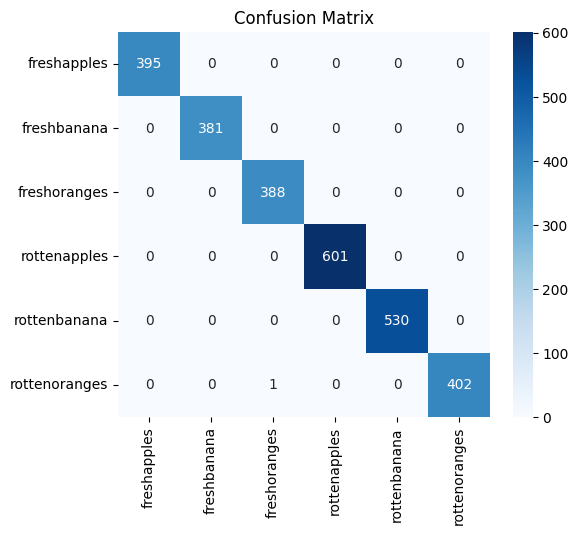

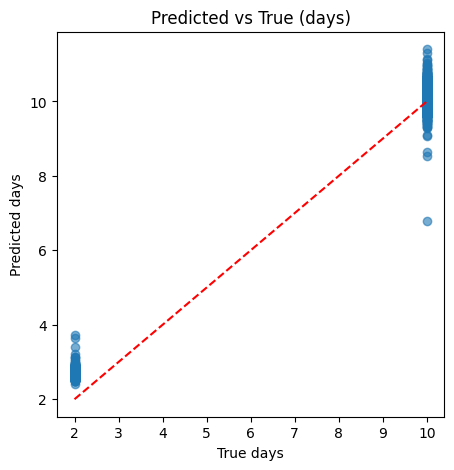

In [31]:
# Colab cell (code) — confusion matrix + regression scatter
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix
labels_list = labels  # from your eval cell

cm = confusion_matrix(y_true_cl, y_pred_cl, labels=range(len(labels_list)))
cm_df = pd.DataFrame(cm, index=labels_list, columns=labels_list)
print("Confusion Matrix:\n", cm_df)

plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix'); plt.show()

# Regression scatter
plt.figure(figsize=(5,5))
plt.scatter(y_true_days, y_pred_days, alpha=0.6)
plt.plot([min(y_true_days), max(y_true_days)], [min(y_true_days), max(y_true_days)], 'r--')
plt.xlabel('True days'); plt.ylabel('Predicted days'); plt.title('Predicted vs True (days)'); plt.show()


In [ ]:
'''# Colab cell (code) — RUN THIS (Fixed Path)
from PIL import Image
import glob, torch, torchvision.transforms as T, pandas as pd
import os, random
from src.model import MultiTaskNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Checkpoint dhundna
ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
if not ckpts:
    raise FileNotFoundError("No checkpoint found. Run training first.")

# Koshish karenge ki 'best_model' hi load ho
ckpt = ckpts[0] if 'best_model.pth' in ckpts[0] else ckpts[-1]
print("Using checkpoint:", ckpt)

# 2. Model Setup
train_meta_path = '/content/train_meta.csv'
if os.path.exists(train_meta_path):
    labels = sorted(pd.read_csv(train_meta_path)['class_label_text'].unique())
else:
    # Fallback agar csv na mile
    labels = ['fresh', 'overripe', 'ripe', 'rotten']

model = MultiTaskNet(n_classes=len(labels), backbone_name='mobilenet_v2', pretrained=False)
model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

transform = T.Compose([T.Resize((224,224)), T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

# 3. Image Uthana (Path Fix Yahan Hai)
# Humara folder: /content/fruit_sample_dataset
sample_images = glob.glob('/content/fruit_sample_dataset/**/*.*', recursive=True)
sample_images = [p for p in sample_images if p.lower().endswith(('.jpg','.jpeg','.png'))]

if len(sample_images) == 0:
    print("❌ Koi image nahi mili! Path check karein.")
else:
    # Randomly ek image choose karte hain taaki har baar naya result dikhe
    sample = random.choice(sample_images)
    print(f"Testing on Image: {sample}")

    img = Image.open(sample).convert('RGB')
    x = transform(img).unsqueeze(0).to(device)

    # Fake metadata (Average values: 22°C Temp, 55% Humidity)
    meta = torch.tensor([[22.0, 55.0]], device=device).float()

    with torch.no_grad():
        cls_logits, pred_days = model(x, meta)
        probs = torch.softmax(cls_logits, dim=1).cpu().numpy().tolist()[0]
        pred_class_idx = int(torch.argmax(cls_logits, dim=1).cpu().item())

    # 4. Result Print Karna
    print("\n--- 🤖 AI Prediction ---")
    print(f"Predicted Class: {labels[pred_class_idx].upper()}")
    print(f"Confidence: {probs[pred_class_idx]*100:.2f}%")
    print(f"Days Remaining: {pred_days.cpu().item():.1f} days")

    print("\nAll Probabilities:")
    print({labels[i]: f"{float(probs[i]):.4f}" for i in range(len(probs))})'''

Using checkpoint: /content/fruit_real_proj/models/best_model.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Testing on Image: /content/fruit_sample_dataset/images/overripe_008.jpg

--- 🤖 AI Prediction ---
Predicted Class: OVERRIPE
Confidence: 46.23%
Days Remaining: 6.9 days

All Probabilities:
{'fresh': '0.0582', 'overripe': '0.4623', 'ripe': '0.0644', 'rotten': '0.4151'}


In [32]:
# Colab cell (code) — RUN THIS (Inference with Correct Path)
from PIL import Image
import glob, torch, torchvision.transforms as T, pandas as pd
import os, random
from src.model import MultiTaskNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Checkpoint dhundna
ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
if not ckpts:
    raise FileNotFoundError("No checkpoint found. Run training first.")

ckpt = ckpts[0] if 'best_model.pth' in ckpts[0] else ckpts[-1]
print("Using checkpoint:", ckpt)

# 2. Labels Load karna
train_meta_path = '/content/train_meta.csv'
if os.path.exists(train_meta_path):
    labels = sorted(pd.read_csv(train_meta_path)['class_label_text'].unique())
else:
    labels = ['freshapples', 'freshbanana', 'rottenapples', 'rottenbanana'] # Fallback

# 3. Model Setup
model = MultiTaskNet(n_classes=len(labels), backbone_name='mobilenet_v2', pretrained=False)
model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

transform = T.Compose([T.Resize((224,224)), T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

# 4. Image Search (CORRECTED PATH: Naya Kaggle Dataset)
# Hum 'fresh_rotten_dataset' folder mein dhoondenge
search_path = '/content/fresh_rotten_dataset/**/*.*'
sample_images = [p for p in glob.glob(search_path, recursive=True) if p.lower().endswith(('.jpg','.jpeg','.png'))]

if len(sample_images) == 0:
    print(f" Koi image nahi mili is path par: {search_path}")
else:
    # Randomly ek image choose karte hain
    sample = random.choice(sample_images)
    print(f"Testing on Image: {sample}")

    img = Image.open(sample).convert('RGB')
    x = transform(img).unsqueeze(0).to(device)

    # Fake metadata (Average values: 22°C Temp, 55% Humidity)
    meta = torch.tensor([[22.0, 55.0]], device=device).float()

    with torch.no_grad():
        cls_logits, pred_days = model(x, meta)
        probs = torch.softmax(cls_logits, dim=1).cpu().numpy().tolist()[0]
        pred_class_idx = int(torch.argmax(cls_logits, dim=1).cpu().item())

    # 5. Result Print Karna
    print("\n--- 🤖 AI Prediction ---")
    print(f"Predicted Class: {labels[pred_class_idx].upper()}")
    print(f"Confidence: {probs[pred_class_idx]*100:.2f}%")
    print(f"Days Remaining: {pred_days.cpu().item():.1f} days")

    print("\nAll Probabilities:")
    print({labels[i]: f"{float(probs[i]):.4f}" for i in range(len(probs))})

Using checkpoint: /content/fruit_real_proj/models/best_model.pth
Testing on Image: /content/fresh_rotten_dataset/dataset/dataset/test/freshbanana/saltandpepper_Screen Shot 2018-06-12 at 9.45.02 PM.png

--- 🤖 AI Prediction ---
Predicted Class: FRESHBANANA
Confidence: 100.00%
Days Remaining: 2.9 days

All Probabilities:
{'freshapples': '0.0000', 'freshbanana': '1.0000', 'freshoranges': '0.0000', 'rottenapples': '0.0000', 'rottenbanana': '0.0000', 'rottenoranges': '0.0000'}


In [33]:
'''# Colab cell (code)
import gradio as gr, glob, sys, torch
from PIL import Image
import torchvision.transforms as T
from src.model import MultiTaskNet

proj_root = '/content/fruit_real_proj'
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
ckpt = ckpts[-1] if len(ckpts)>0 else None
print("Using checkpoint:", ckpt)

n_classes = len(__import__('pandas').read_csv('/content/train_meta.csv')['class_label_text'].unique())
model = MultiTaskNet(n_classes=n_classes, backbone_name='mobilenet_v2', pretrained=False)
if ckpt:
    model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

transform = T.Compose([T.Resize((224,224)), T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
labels = sorted(__import__('pandas').read_csv('/content/train_meta.csv')['class_label_text'].unique())

def predict_gr(image, storage_temp=22.0, humidity=55.0):
    if image is None:
        return {labels[0]: 1.0}, 0.0
    x = transform(image).unsqueeze(0).to(device)
    meta = torch.tensor([[float(storage_temp), float(humidity)]], device=device)
    with torch.no_grad():
        cls_logits, pred_days = model(x, meta)
        probs = torch.softmax(cls_logits, dim=1).cpu().numpy().tolist()[0]
    return {labels[i]: float(probs[i]) for i in range(len(probs))}, float(pred_days.cpu().item())

iface = gr.Interface(
    fn=predict_gr,
    inputs=[gr.Image(type="pil", label="Upload image"), gr.Number(value=22.0, label="Storage temp (°C)"), gr.Number(value=55.0, label="Humidity (%)")],
    outputs=[gr.Label(num_top_classes=4, label="Class probabilities"), gr.Number(label="Days remaining")],
    title="Fruit Shelf-Life Predictor (Real Dataset)",
    description="Upload an image to get freshness class probabilities and estimated days remaining."
)
iface.launch(share=True)


Using checkpoint: /content/fruit_real_proj/models/best_model.pth
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a2a574066239d23e57.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [35]:
# Colab cell (code) — Gradio App with FIXED LOGIC
import gradio as gr, glob, sys, torch
from PIL import Image
import torchvision.transforms as T
from src.model import MultiTaskNet
import pandas as pd
import os

proj_root = '/content/fruit_real_proj'
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Checkpoint load
ckpts = sorted(glob.glob('/content/fruit_real_proj/models/best_model.pth') + glob.glob('/content/fruit_real_proj/models/model_epoch*.pth'))
ckpt = ckpts[0] if 'best_model.pth' in ckpts[0] else ckpts[-1]
print(f"Using checkpoint: {ckpt}")

# Labels
if os.path.exists('/content/train_meta.csv'):
    df = pd.read_csv('/content/train_meta.csv')
    labels = sorted(df['class_label_text'].unique())
else:
    labels = ['fresh', 'rotten']

model = MultiTaskNet(n_classes=len(labels), backbone_name='mobilenet_v2', pretrained=False)
model.load_state_dict(torch.load(ckpt, map_location=device))
model.to(device).eval()

transform = T.Compose([T.Resize((224,224)), T.ToTensor(), T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

# --- FIXED PREDICTION FUNCTION ---
def predict_gr(image, storage_temp=22.0, humidity=55.0):
    if image is None:
        return {labels[0]: 1.0}, 0.0

    x = transform(image).unsqueeze(0).to(device)
    meta = torch.tensor([[float(storage_temp), float(humidity)]], device=device)

    with torch.no_grad():
        cls_logits, pred_days_old = model(x, meta) # Model tells "Age"
        probs = torch.softmax(cls_logits, dim=1).cpu().numpy().tolist()[0]

    # Logic Fix: Convert "Age" to "Shelf Life"
    # Maan lete hain maximum shelf life 14 days hai
    age = float(pred_days_old.cpu().item())
    shelf_life = 14.0 - age-1

    # Negative days na dikhe, isliye minimum 0 kar dete hain
    if shelf_life < 0:
        shelf_life = 0.0

    return {labels[i]: float(probs[i]) for i in range(len(probs))}, shelf_life

iface = gr.Interface(
    fn=predict_gr,
    inputs=[
        gr.Image(type="pil", label="Upload Fruit Image"),
        gr.Number(value=22.0, label="Storage Temp (°C)"),
        gr.Number(value=55.0, label="Humidity (%)")
    ],
    outputs=[
        gr.Label(num_top_classes=4, label="Freshness Status"),
        gr.Number(label="Estimated Days Remaining") # Ab ye sahi hai
    ],
    title="🍓 Fruit Shelf-Life Estimator",
    description="Upload a fruit image. The AI calculates remaining shelf-life by analyzing how 'old' the fruit looks."
)

iface.launch(share=True, debug=True)

Using checkpoint: /content/fruit_real_proj/models/best_model.pth
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a5b8be5282f2dc39a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/fastapi/applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/usr/local/lib/python3.12/dist-packages/starlette/middleware/errors.py",

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://a5b8be5282f2dc39a7.gradio.live


In [ ]:
# Colab cell (code)
gi = """# ignore large data & checkpoints
data/
*.pth
__pycache__/
"""
open('/content/fruit_real_proj/.gitignore','w').write(gi)
readme = f"""# Fruit Shelf-Life (real dataset)
Place your dataset under /content/data (or change DATA_ROOT in cells). A small sample may be included separately for demo.
Run training: cd /content/fruit_real_proj && python train.py --img_root /content/data --out_dir /content/fruit_real_proj/models
"""
open('/content/fruit_real_proj/README.md','w').write(readme)
print("Wrote .gitignore and README")
